# INTRODUÇÃO

    Dada a alta volatilidade e discrepâncias de qualidade no ensino brasileiro, muito se questiona a respeito do 
    rendimento no principal meio de entrada ao ensino superior, o ENEM. Este projeto visa, segundo dados
    característicos de cada escola, analisar microdados existentes no INEP para, por meio de padrões e
    probabilidades, prever uma nota média no ENEM segundo diversos fatores. Caracterizando ou não a existência de
    correlações entre singularidades e um bom rendimento na prova.

    O projeto conta com as seguintes variáveis explicativas, que auxiliarião na construção de probabilidades: Ano 
    de aplicação do ENEM, estado que se encontra a escola, local (urbano ou rural), porte escolar e taxa de 
    aprovação dos alunos no ensino médio.

    Pergunta: Qual a nota média no ENEM de uma escola considerando o ano de aplicação do ENEM, a região do Brasil
    na qual está localizada, o porte e a taxa de aprovação no Ensino Médio, e se é urbana ou rural?

# MINERANDO DADOS

    Visto que a análise toma em conta apenas 5 features, foi necessária a limpeza da base de dados, remoção de 
    colunas indesejadas e dados irrelevantes, para não haver interferência nos valores das probabilidades e 
    garantir uma análise significativa ao projeto.

In [1]:
#Importando bibliotecas necessárias para a execução do projeto
import os
import scipy.stats as stats
from scipy.stats import t, norm, probplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

#Acessando base de dados 
microdados = pd.read_excel('microdados.xlsx')

# Limpeza da Base de Dados

In [2]:
# Filtrando a base de dados, deixando somente as colunas relacionadas as features escolidas para o projeto. Dessa forma, tornando mais fácil a manipulação das colunas para a análise exploratória dos dados.
dados = microdados.loc[:,['NU_MEDIA_TOT','NU_ANO', 'SG_UF_ESCOLA','TP_LOCALIZACAO_ESCOLA','PORTE_ESCOLA','NU_TAXA_APROVACAO']]

In [3]:
# Renomeando as colunas para facilitar as análises e entendimento das colunas respectivas

dados.rename(columns={'NU_MEDIA_TOT':'MEDIA_TOTAL_ENEM'}, inplace=True)
dados.rename(columns={'NU_ANO':'ANO'}, inplace=True)
dados.rename(columns={'SG_UF_ESCOLA':'UF_ESCOLA'}, inplace=True)
dados.rename(columns={'TP_LOCALIZACAO_ESCOLA':'LOCAL'}, inplace=True)
dados.rename(columns={'PORTE_ESCOLA':'TAMANHO'}, inplace=True)
dados.rename(columns={'NU_TAXA_APROVACAO':'TAXA_APROVACAO'}, inplace=True)

In [4]:
# Adequando cada coluna com seus tipos de dados

dados['TAMANHO'] = dados['TAMANHO'].astype('category')
dados['UF_ESCOLA'] = dados['UF_ESCOLA'].astype('category')
dados['LOCAL'] = dados['LOCAL'].astype('category')


dados['LOCAL'] = dados['LOCAL'].cat.rename_categories(['Urbano', 'Rural'])


dados = dados.dropna(axis=0, how='any')

# Análise Exploratória 

    Diante de vastas informações, nosso objetivo partiu-se da compreensão dos valores das features segundo suas 
    relações com o target principal. A partir de gráficos de dispersão, histogramas e estatísticas iniciamos a 
    análise exploratória dos dados, para compreensão de quais fatores apresentariam uma maior influência diante
    os demais. 

## 1. Média Enem X Ano de Aplicação

Correlação entre média total no ENEM e ano de aplicação: 0.3619213334808278


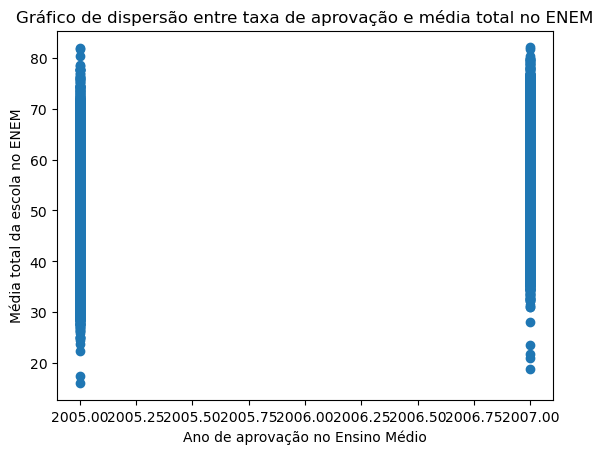

In [5]:
# Análise de target quantitativa e feature quantitativa

# Grau de correlação entre ano de aplicação e média total no ENEM
print(f'Correlação entre média total no ENEM e ano de aplicação: {dados.ANO.corr(dados.MEDIA_TOTAL_ENEM)}')

plt.scatter(dados.ANO, dados.MEDIA_TOTAL_ENEM)
plt.title('Gráfico de dispersão entre taxa de aprovação e média total no ENEM')
plt.xlabel('Ano de aprovação no Ensino Médio')
plt.ylabel('Média total da escola no ENEM');

## 2. Média Enem X Taxa Aprovação no Ensino Médio

Correlação entre média total no ENEM e taxa de aprovação no Ensino Médio: 0.47909482648601553


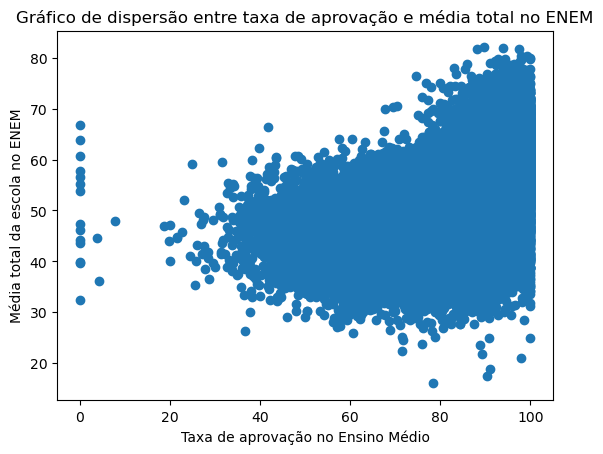

In [6]:
# Análise de target quantitativa e feature quantitativa

# Grau de correlação entre taxa de aprovação no Ensino Médio e média total no ENEM
print(f'Correlação entre média total no ENEM e taxa de aprovação no Ensino Médio: {dados.TAXA_APROVACAO.corr(dados.MEDIA_TOTAL_ENEM)}')

# Gráfico de dispersão entre taxa de aprovação e média total no ENEM
plt.scatter(dados.TAXA_APROVACAO, dados.MEDIA_TOTAL_ENEM)
plt.title('Gráfico de dispersão entre taxa de aprovação e média total no ENEM')
plt.xlabel('Taxa de aprovação no Ensino Médio')
plt.ylabel('Média total da escola no ENEM');

    Visto que são dados reais e informações empíricas, a análise dos dados ultrapassa seu valor numérico e infere
    as disparidades de ensino e facilidades de alcance de notas maiores segundo as condições vividas pelo
    estudante.
    Tomando em conta, por exemplo, o gráfico de dispersão de aprovação no ensino médio e nota média no ENEM, é 
    evidente e intuitivo que o ensino base tem uma importância altíssima na preparação para o ensino superior, 
    deste modo, é possível perceber que o ínice de notas maiores depreendem-se das escolas que apresentam uma 
    maior taxa de aprovação do ensino médio.

## 3. Média Enem X Região do País

In [7]:
#Separando os estados brasileiros de acordo com sua região no país para facilitar análise por histogramas

# Dicionário de estado por região para facilitar a divisão
regioes = {
    'Norte': ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MS', 'MT'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']}

# Percorrendo as regiões e criando nova coluna no dataframe com a região específica de cada estado
for regiao, estados in regioes.items():
    dados.loc[dados['UF_ESCOLA'].isin(estados), 'REGIAO'] = regiao
    

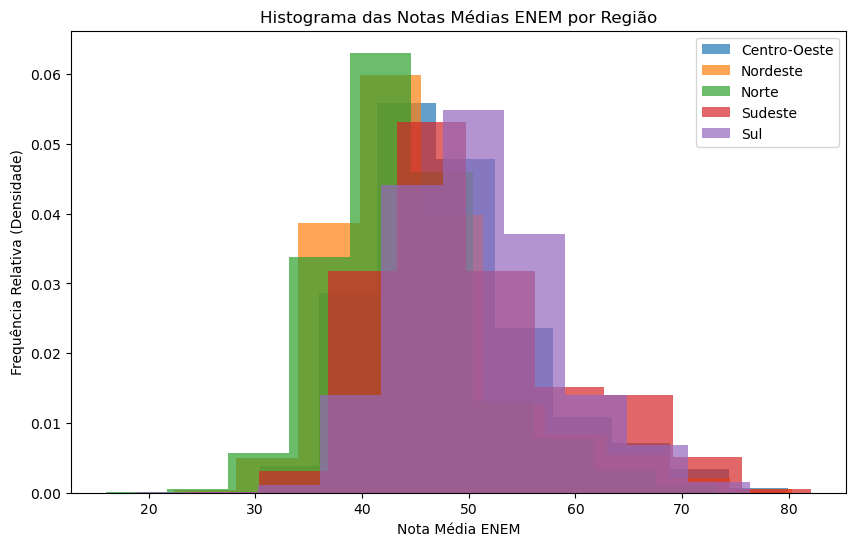

In [8]:
# Plotando em um histograma só
regiao_nota = dados.groupby('REGIAO')['MEDIA_TOTAL_ENEM']

plt.figure(figsize=(10, 6))
plt.xlabel('Nota Média ENEM')
regiao_nota.plot(kind='hist', alpha=0.7, legend=True, density = True) 
plt.title('Histograma das Notas Médias ENEM por Região')
plt.ylabel('Frequência Relativa (Densidade)');

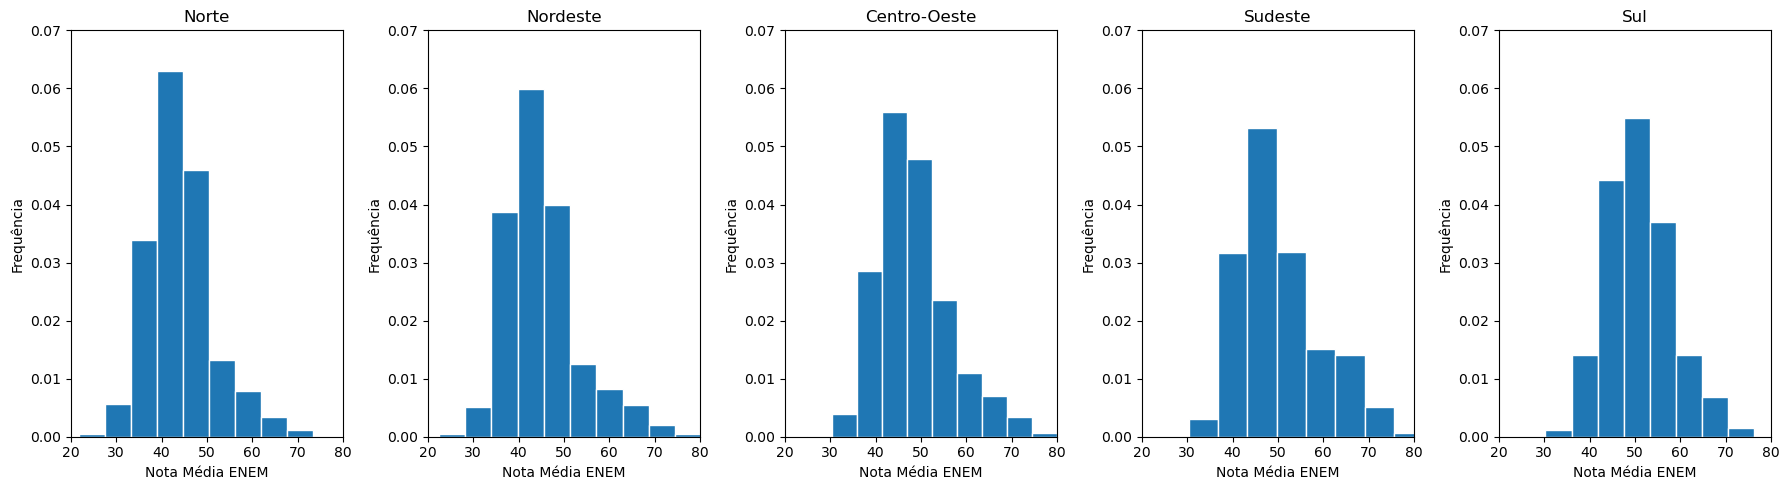

In [9]:
# Separado em um histograma por região
dados_norte = dados.loc[dados.REGIAO=='Norte', :]
dados_nordeste = dados.loc[dados.REGIAO=='Nordeste', :]
dados_centro_oeste = dados.loc[dados.REGIAO=='Centro-Oeste', :]
dados_sudeste = dados.loc[dados.REGIAO=='Sudeste', :]
dados_sul = dados.loc[dados.REGIAO=='Sul', :]

plt.figure(figsize=(18,5)) 

plt.subplot(1,5,1)
plt.title('Norte')
plt.xlabel('Nota Média ENEM')
plt.ylabel('Frequência')
plt.xlim(20,80)
plt.ylim(0,0.07)
plt.hist(dados_norte.MEDIA_TOTAL_ENEM, density = True, edgecolor = 'white')

plt.subplot(1,5,2)
plt.title('Nordeste')
plt.xlabel('Nota Média ENEM')
plt.ylabel('Frequência')
plt.xlim(20,80)
plt.ylim(0,0.07)
plt.hist(dados_nordeste.MEDIA_TOTAL_ENEM, density = True, edgecolor = 'white')

plt.subplot(1,5,3)
plt.title('Centro-Oeste')
plt.xlabel('Nota Média ENEM')
plt.ylabel('Frequência')
plt.xlim(20,80)
plt.ylim(0,0.07)
plt.hist(dados_centro_oeste.MEDIA_TOTAL_ENEM, density = True, edgecolor = 'white')

plt.subplot(1,5,4)
plt.title('Sudeste')
plt.xlabel('Nota Média ENEM')
plt.ylabel('Frequência')
plt.xlim(20,80)
plt.ylim(0,0.07)
plt.hist(dados_sudeste.MEDIA_TOTAL_ENEM, density = True, edgecolor = 'white')

plt.subplot(1,5,5)
plt.title('Sul')
plt.xlabel('Nota Média ENEM')
plt.ylabel('Frequência')
plt.xlim(20,80)
plt.ylim(0,0.07)
plt.hist(dados_sul.MEDIA_TOTAL_ENEM, density = True, edgecolor = 'white')


plt.tight_layout();

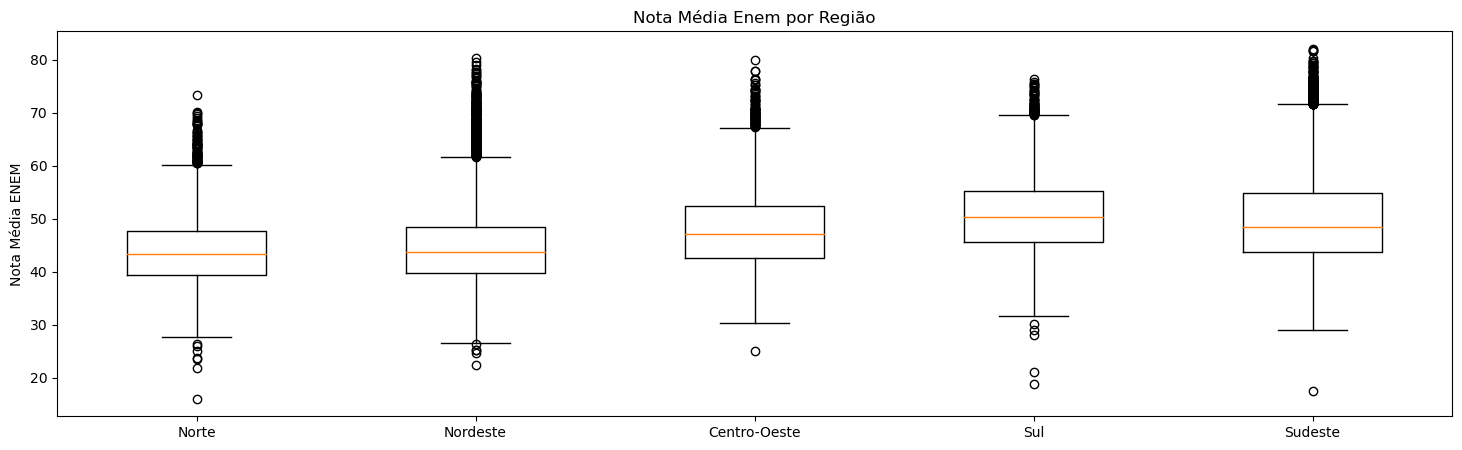

In [10]:
plt.figure(figsize=(18,5))

plt.boxplot([dados_norte.MEDIA_TOTAL_ENEM, dados_nordeste.MEDIA_TOTAL_ENEM, dados_centro_oeste.MEDIA_TOTAL_ENEM, dados_sul.MEDIA_TOTAL_ENEM, dados_sudeste.MEDIA_TOTAL_ENEM], labels = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sul', 'Sudeste'])
plt.title('Nota Média Enem por Região')
plt.ylabel('Nota Média ENEM');

In [11]:
print("Estatísticas da Média Total do ENEM por Região")
dados.groupby('REGIAO')['MEDIA_TOTAL_ENEM'].describe()


Estatísticas da Média Total do ENEM por Região


,count,mean,std,min,25%,50%,75%,max
REGIAO,,,,,,,,
Centro-Oeste,2620.0,48.413286,8.019566,24.96,42.65,47.115,52.4525,79.90
Nordeste,7708.0,45.180711,8.089487,22.41,39.69,43.740,48.4900,80.32
Norte,2232.0,44.063414,7.150650,16.01,39.35,43.260,47.7525,73.26
Sudeste,15060.0,50.243669,8.907691,17.40,43.71,48.430,54.8400,82.04
Sul,4861.0,50.946577,7.288648,18.77,45.67,50.370,55.2300,76.33


    Ademais, explorando o gráfico de maiores médias segundo a região que pertence a escola, é possível observar o 
    padrão das notas do ensino do sul e sudeste seguindo uma distribuição normal e simétrico, com indíces de
    rendimento bons. Tal fato pode ser devido ao salto que, principalmente as regiões no sul e sudeste do país, 
    vem tendo a partir de 2005 no índice de desenvolvimento do ensino básico (IDEB), que é o principal formador de
    alunos passíveis a notas altas no enem como pôde ser visto no gráfico analisado anteriormente. 
    
    Segundo os dados análisados nos boxplots do rendimento por região também é passível observar que as maiores
    médias advém de estados presentes no sul e sudeste do país, entretanto, é possível observar que a região com
    valores mais aberrantes é o nordeste, isso pode ser visto devido ao alto investimento desta região em ensino
    havendo as melhores escolas para se estudar, sendo, atualmente, o líder nos índices de educação mas que ainda 
    não afeta todos os estudantes, caracterizando os valores aberrantes. 

## 4. Média Enem X Local (Urbano ou Rural)

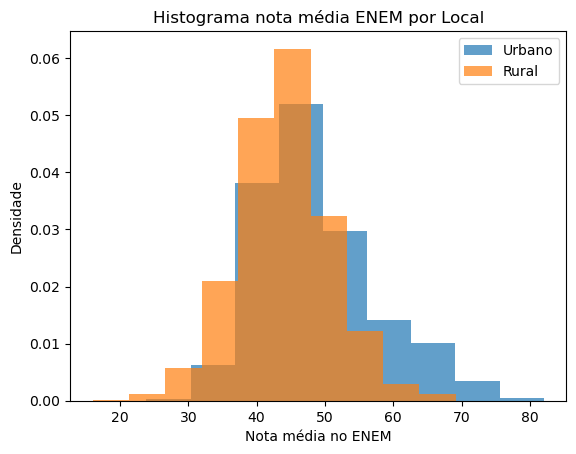

In [12]:
local_nota = dados.groupby('LOCAL')['MEDIA_TOTAL_ENEM']

local_nota.plot(kind='hist', alpha=0.7, legend=True, density=True) # Com densidade

plt.title('Histograma nota média ENEM por Local')
plt.xlabel('Nota média no ENEM')
plt.ylabel('Densidade');

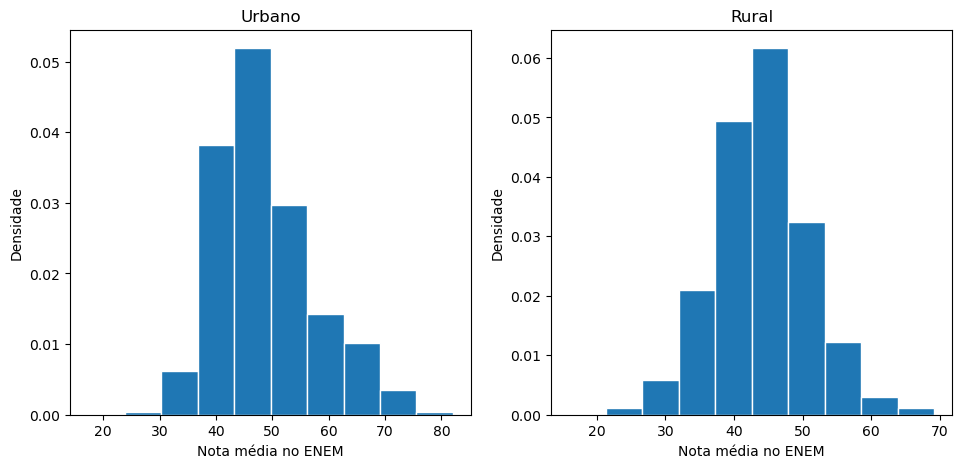

In [13]:
dados_urbano = dados.loc[dados['LOCAL'] == 'Urbano']
dados_rural = dados.loc[dados['LOCAL'] == 'Rural']


plt.figure(figsize=(30,5)) 
plt.subplot(1,5,1)
plt.hist(dados_urbano['MEDIA_TOTAL_ENEM'], density = True, edgecolor = 'white')

plt.title('Urbano')
plt.xlabel('Nota média no ENEM')
plt.ylabel('Densidade')


plt.subplot(1,5,2)
plt.hist(dados_rural['MEDIA_TOTAL_ENEM'], density = True, edgecolor = 'white')

plt.title('Rural')
plt.xlabel('Nota média no ENEM')
plt.ylabel('Densidade');


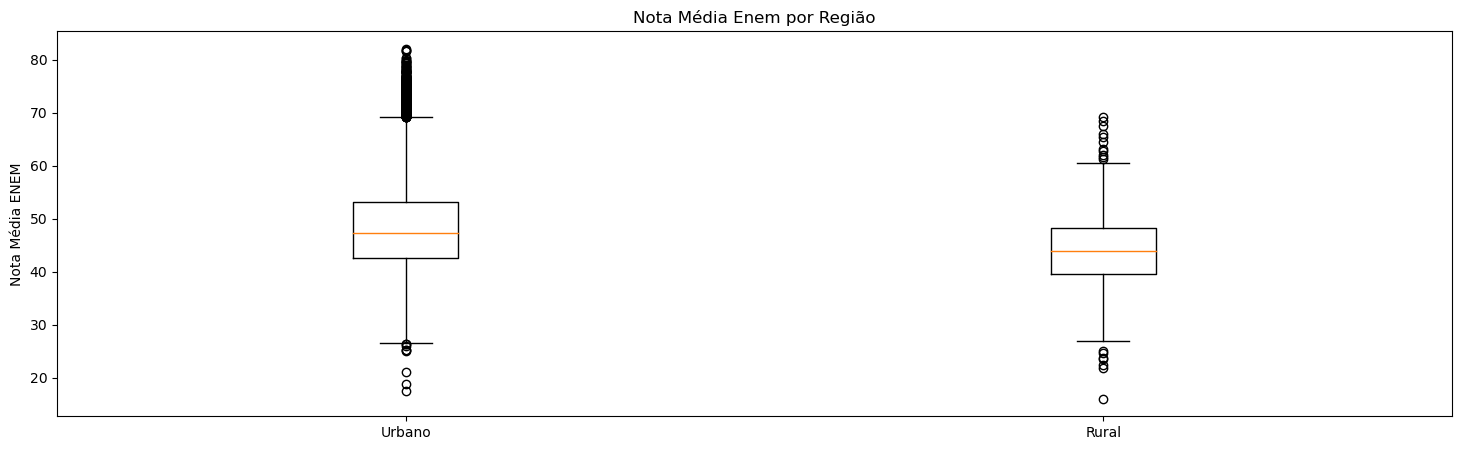

In [14]:
plt.figure(figsize=(18,5))

plt.boxplot([dados_urbano.MEDIA_TOTAL_ENEM, dados_rural.MEDIA_TOTAL_ENEM], labels = ['Urbano', 'Rural'])
plt.title('Nota Média Enem por Região')
plt.ylabel('Nota Média ENEM');

In [15]:
print("Estatísticas da Média Total do ENEM por Local (Urbano ou Rural)")
dados.groupby('LOCAL')['MEDIA_TOTAL_ENEM'].describe()

Estatísticas da Média Total do ENEM por Local (Urbano ou Rural)


,count,mean,std,min,25%,50%,75%,max
LOCAL,,,,,,,,
Urbano,31541.0,48.712647,8.683990,17.40,42.50,47.21,53.19,82.04
Rural,940.0,43.958138,6.875386,16.01,39.61,43.91,48.16,69.14


    Partindo para a análise do rendimento a partir da localização escolar, torna-se evidente o que muitas vezes 
    é dado como intuitivo, as maiores notas são alcançadas por escolas presentes no meio urbano e que possuem
    um contato rápido e eficiente com as contemporaneidades, o que tem um peso muito grande para esta prova, visto
    que o ENEM prioriza perguntas que envolvam conhecimentos atuais e situações que estão em vigor nos anos
    próximos a prova.

## 5. Média Enem X Tamanho Escola

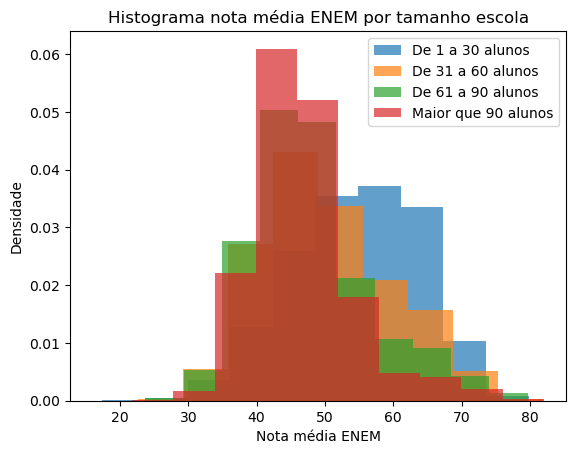

In [16]:
tamanho = dados.groupby('TAMANHO')['MEDIA_TOTAL_ENEM']


tamanho.plot(kind='hist', alpha=0.7, legend=True, density=True)
plt.title('Histograma nota média ENEM por tamanho escola')
plt.xlabel('Nota média ENEM')
plt.ylabel('Densidade');

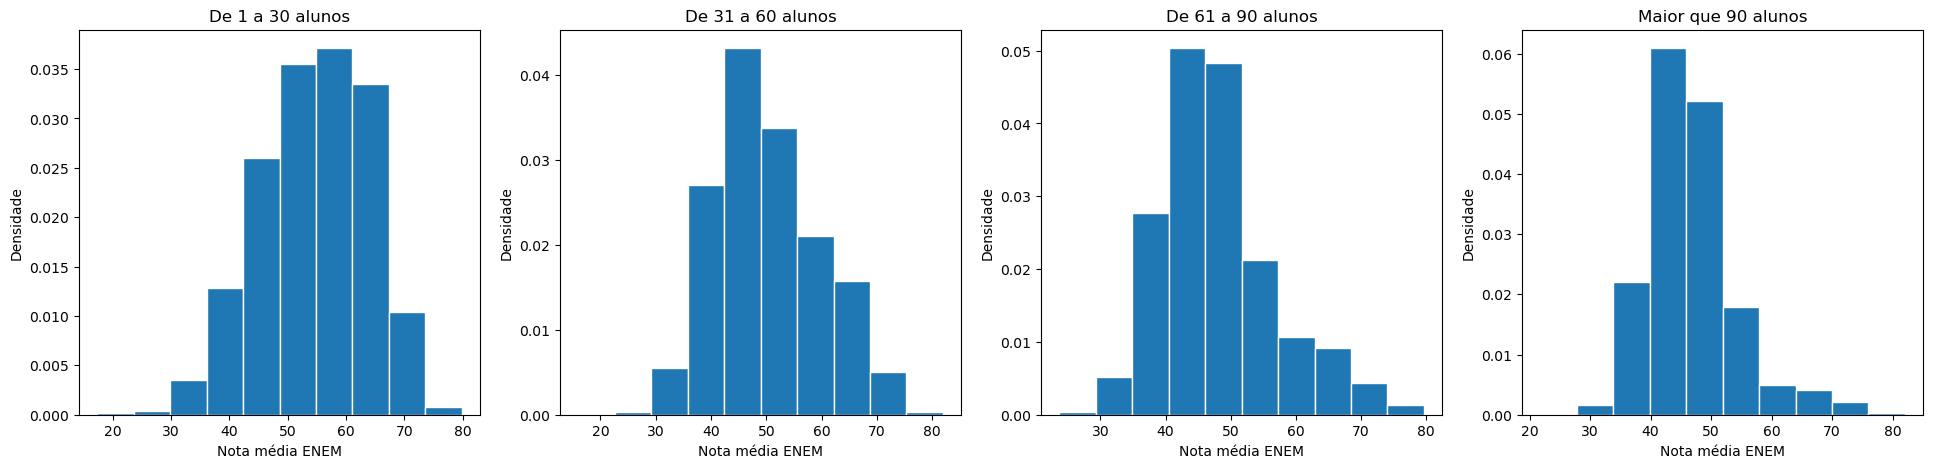

In [17]:
dados_90 = dados.loc[dados['TAMANHO'] == 'Maior que 90 alunos']
dados_1_30 = dados.loc[dados['TAMANHO'] == 'De 1 a 30 alunos']
dados_61_90 = dados.loc[dados['TAMANHO'] == 'De 61 a 90 alunos']
dados_31_60 = dados.loc[dados['TAMANHO'] == 'De 31 a 60 alunos']

plt.figure(figsize=(30,5))

plt.subplot(1,5,1)
plt.hist(dados_1_30['MEDIA_TOTAL_ENEM'], density=True, edgecolor = 'white')
plt.title('De 1 a 30 alunos')
plt.xlabel('Nota média ENEM')
plt.ylabel('Densidade')

plt.subplot(1,5,2)
plt.hist(dados_31_60['MEDIA_TOTAL_ENEM'], density=True, edgecolor = 'white')
plt.title('De 31 a 60 alunos')
plt.xlabel('Nota média ENEM')
plt.ylabel('Densidade')


plt.subplot(1,5,3)
plt.hist(dados_61_90['MEDIA_TOTAL_ENEM'], density=True, edgecolor = 'white')
plt.title('De 61 a 90 alunos')
plt.xlabel('Nota média ENEM')
plt.ylabel('Densidade')

plt.subplot(1,5,4)
plt.hist(dados_90['MEDIA_TOTAL_ENEM'], density=True, edgecolor = 'white')
plt.title('Maior que 90 alunos')
plt.xlabel('Nota média ENEM')
plt.ylabel('Densidade');

In [18]:
print("Estatísticas da Média Total do ENEM por Tamanho da Escola")
dados.groupby('TAMANHO')['MEDIA_TOTAL_ENEM'].describe()

Estatísticas da Média Total do ENEM por Tamanho da Escola


,count,mean,std,min,25%,50%,75%,max
TAMANHO,,,,,,,,
De 1 a 30 alunos,3784.0,54.556456,9.251326,17.40,47.920,55.17,61.7725,79.82
De 31 a 60 alunos,6863.0,50.248335,9.437491,16.01,43.175,48.93,56.6800,81.89
De 61 a 90 alunos,5498.0,47.930668,8.809041,23.71,41.820,46.63,52.0100,79.67
Maior que 90 alunos,16336.0,46.703445,7.289088,21.79,41.840,45.72,50.0425,82.04


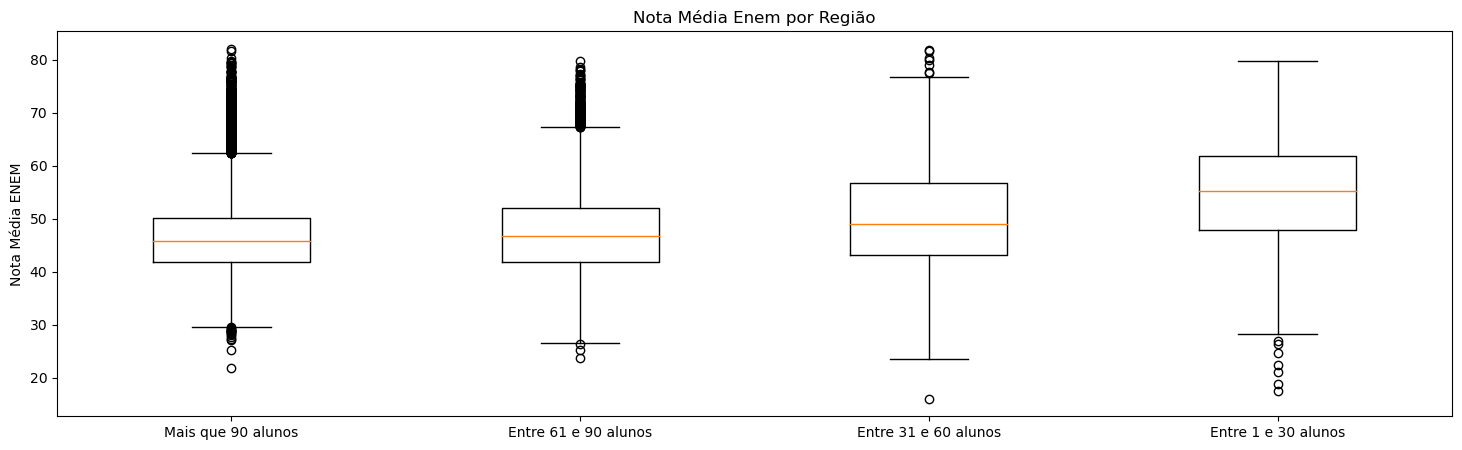

In [19]:
plt.figure(figsize=(18,5))

plt.boxplot([dados_90.MEDIA_TOTAL_ENEM, dados_61_90.MEDIA_TOTAL_ENEM, dados_31_60.MEDIA_TOTAL_ENEM, dados_1_30.MEDIA_TOTAL_ENEM], labels = ['Mais que 90 alunos', 'Entre 61 e 90 alunos', 'Entre 31 e 60 alunos', 'Entre 1 e 30 alunos'])
plt.title('Nota Média Enem por Região')
plt.ylabel('Nota Média ENEM');

    Por fim, há características importantes evidentes na última análise de rendimento de acordo com tamanho
    escolar. Tal situação é, atualmente, muito explorada no ensino produtivo e qualitativo, no qual é visível 
    um maior entendimento e aprovação do ensino nas escolas que conseguem oferecer o máximo de atenção
    para o aluno. Essa afirmativa pode ser observada através dos boxplots e histogramas construídos, nos quais as 
    escolas com menor quantidade de alunos apresenta uma média mais alta de notas e uma menor quantidade de
    números aberrantes. O processo é contrário em escolas com grandes quantidades de alunos, que contém 
    muitas médias anormais e pouca padronização do rendimento.

# MODELOS DE PREDIÇÃO

In [20]:
# Criando dummies para análise de features qualitativas
df_dummies = pd.get_dummies(dados, columns=['REGIAO'], drop_first=True)
df_dummies.drop('UF_ESCOLA', axis=1, inplace=True)


df_dummies = pd.get_dummies(df_dummies, columns=['LOCAL'], drop_first=True)

df_dummies = pd.get_dummies(df_dummies, columns=['TAMANHO'], drop_first=True)

df_dummies

,MEDIA_TOTAL_ENEM,ANO,TAXA_APROVACAO,REGIAO_Nordeste,REGIAO_Norte,REGIAO_Sudeste,REGIAO_Sul,LOCAL_Rural,TAMANHO_De 31 a 60 alunos,TAMANHO_De 61 a 90 alunos,TAMANHO_Maior que 90 alunos
0,69.03,2007,91.9,0,1,0,0,0,0,0,1
2,64.83,2005,86.5,0,1,0,0,0,0,0,1
4,58.84,2007,74.2,0,1,0,0,0,0,0,0
6,35.44,2005,69.3,0,1,0,0,0,0,0,0
7,48.46,2005,86.5,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
67602,57.61,2005,96.4,0,0,0,0,0,0,0,1
67604,72.62,2007,97.4,0,0,0,0,0,0,0,1
67606,58.83,2005,89.2,0,0,0,0,0,1,0,0
67608,48.44,2007,79.3,0,0,0,0,0,0,0,1


In [21]:
X = df_dummies[['ANO', 'TAXA_APROVACAO', 'REGIAO_Nordeste', 'REGIAO_Norte',
       'REGIAO_Sudeste', 'REGIAO_Sul','LOCAL_Rural', 'TAMANHO_De 31 a 60 alunos','TAMANHO_De 61 a 90 alunos','TAMANHO_Maior que 90 alunos']]
Y = df_dummies['MEDIA_TOTAL_ENEM']


def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X.values) 
    model = sm.OLS(Y, X_cp)
    results = model.fit()
    
    return results


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)


results = regress(y_train,X_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MEDIA_TOTAL_ENEM   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     2099.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:58:12   Log-Likelihood:                -96645.
No. Observations:               29232   AIC:                         1.933e+05
Df Residuals:                   29221   BIC:                         1.934e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5923.3208     77.627    -76.305      0.000   -6075.473   -5771.168
x1             2.9689      0.039     76.720      0.000       2.893       3.045
x2             0.2469      0.003     81.452      0.000       0.241       0.253
x3            -2.6960      0.158    -17.030      0.000      -3.006      -2.386
x4            -3.6787      0.201    -18.282      0.000      -4.073      -3.284
x5             0.7574      0.148      5.117      0.000       0.467       1.047
x6             1.8806      0.169     11.149      0.000       1.550       2.211
x7            -5.7770      0.234    -24.715      0.000      -6.235      -5.319
x8            -2.4594      0.142    -17.266      0.000      -2.739      -2.180
x9            -3.4256      0.151    -22.614      0.000      -3.722      -3.129
x10           -2.9985      0.136    -22.052      0.000      -3.265      -2.732
==============================================================================
Omnibus:                     2053.448   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2906.153
Skew:                           0.601   Prob(JB):                         0.00
Kurtosis:                       3.971   Cond. No.                     4.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Previsões no conjunto de teste
predictions_rl = results.predict(sm.add_constant(X_test))

# Validação
mae = mean_absolute_error(y_test, predictions_rl)
mse = mean_squared_error(y_test, predictions_rl)
rmse = mean_squared_error(y_test, predictions_rl, squared=False)
r2 = r2_score(y_test, predictions_rl)


# Exibindo os resultados
# MAE: média da diferença entre as previsões e os valores reais
# Portanto, quanto menor a MAE melhor
print(f'MAE: {mae:.2f}')

# MSE: média dos quadrados das diferenças entre as previsões e os valores reais
# Portanto, quanto menor a MSE melhor
print(f'MSE: {mse:.2f}')

# RMSE: raiz quadrada do MSE, usado para garantir mesma escala que a variável de destino
print(f'RMSE: {rmse:.2f}')

# R2: variabilidade na variável dependente 
# varia entre 0 e 1, sendo 1 o ajuste perfeito
# R2 = 1 − (SSE/SST) 
# SSE: soma dos quadrados dos erros; SST: soma total dos quadrados.
print(f'R^2: {r2:.2f}')

MAE: 5.16
MSE: 45.58
RMSE: 6.75
R^2: 0.42


## CRITÉRIOS PARA VALIDAR O MODELO DE REGRESSÃO DE LINEAR

1 - O modelo é linear nos parâmetros (features)
    - Caso o valor p, dado por P>|t| nos resultados da regressão OLS, seja zero ou próximo de zero, tem-se evidências de que o modelo é linear nos parâmetros.

                P>|t|
        ANO              0.000
        TAXA_APROVACAO	 0.000
        REGIAO_Nordeste  0.000
        REGIAO_Norte 	 0.000
        REGIAO_Sudeste	 0.000
        REGIAO_Sul	     0.000
        LOCAL_Rural	     0.000

    - Como todos os valores p para as features selecionadas são 0, pode-se afirmar que O MODELO É LINEAR NESSES PARÂMETROS


2 - Erros independentes
    - Para saber se os erros são independentes, pode-se usar o teste Durbin-Watson, quando o teste resultar em 2, não existirá correlação nos resíduos, ou seja, serão independentes. Esse reultado é exibido como Durbin-Watson nos resutados OLS apresentados.
            
            Durbin-Watson:	0.887
    
    - Conclui-se com o resultado que os ERROS SÃO DEPENDENTES, e possuem correlação positiva.


3 - Os erros seguem distribuição normal
    - Para se certificar que a distribuição dos erros segue uma normal, a Probabilidade Omnibus e a Probabilidade Jarque-Bera, identificadas no resultado da regressão OLS como Prob(Omnibus) e Prob(JB), ambas precisam ser maior do que a significância. A significância considerada para esse projeto é de 10%.

            Prob(Omnibus):	0.000
            Prob(JB):	    0.00

    - Ambas as probabilidades aparecem menores que a significância de 0.1, dando indícios de que a distribuição não se assemelha de uma normal. Porém o gráfico de probabilidade da distribuição normal apresenta o contrário.
    - Conclui-se que os erros NÃO SEGUEM UMA DISTRIBUIÇÃO NORMAL, só se aproximam de uma normal nos valores intermediários, como provado no gráfico probplot abaixo.


4 - Homocedasticidade
    - Para provar a Homocedasticidade, todos os pontos do gráfico de probabilidade tem que estar sobrepondo um ponto da reta, caso isso não aconteca o modelo não se configura dessa maneira.
    - Observando o gráfico, percebe-se que O MODELO TEM HOMOCEDASTICIDADE

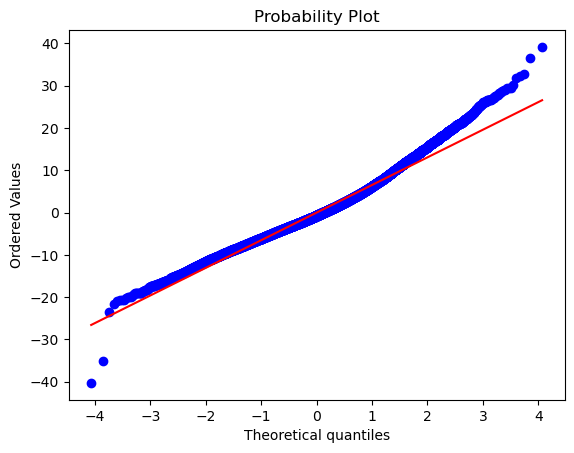

In [23]:
stats.probplot(results.resid, dist='norm', plot=plt);

In [24]:
# Criando o modelo com 100 árvores de decisão
# random_state garante que o modelo produza os mesmos resultados sempre que treinado com os mesmos dados
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# FIT: Treina o modelo
random_forest_model.fit(X_train, y_train)

# Previsões no conjunto de teste
predictions_rg = random_forest_model.predict(X_test)

# Validação
mae = mean_absolute_error(y_test, predictions_rg)
mse = mean_squared_error(y_test, predictions_rg)
rmse = mean_squared_error(y_test, predictions_rg, squared=False)
r2 = r2_score(y_test, predictions_rg)


# Exibindo os resultados
print(f'MAE: {mae:.2f}')

print(f'MSE: {mse:.2f}')

print(f'RMSE: {rmse:.2f}')

print(f'R^2: {r2:.2f}')


MAE: 4.86
MSE: 46.52
RMSE: 6.82
R^2: 0.41


### Entendimento dos resultados - RANDOM FOREST

A MAE, segundo sua definição teórica, significa a diferença entre previsão e valor real. Analisando no contexto do projeto, é possível observar que a aplicação de random forest com estas features e target foi um modelo preditivo razoável visto que a escala analisada é de 0 a 100, portanto uma MAE de 4.55 não causa uma diferença significante na predição. O valor previsto de nota está apenas com 4.55 pontos de diferença do que de fato foi tirado na prova.

Entretanto, observando a MSE traz alta atenção a tona visto que quanto maior a MSE maior a variabilidade. Essa ferramenta de análise aumenta os erros ao quadrado para explicitá-los.

Corroborando com o que pode ser visto na análise do MSE, o Rˆ2 evidencia a problemática de variabilidade do programa, o r-quadrado é uma medida de quão próximo os dados estão da linha de regressão ajustada. A ferramenta de análise R, coeficiente de determinação indica que o programa acertaria próximo de 47% da variabilidade dos dados. Portanto, o programa de fato estaria em uma faixa moderada de execução, não garantindo uma previsão exata mas com uma boa chance de apresentar valores razoáveis de estimativa.

In [25]:
#Árvore de Decisão

# Criando o modelo de árvore de regressão
regression_tree = DecisionTreeRegressor(max_depth=5)

# Treinando o modelo
regression_tree.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
dtree_pred = regression_tree.predict(X_test)

# Avaliando o desempenho do modelo pelo coeficiente de determinação R2
r2_dectree = r2_score(y_test, dtree_pred)
print(r2_dectree)

0.5112072999181407


## Comparando resultados de ambos modelos

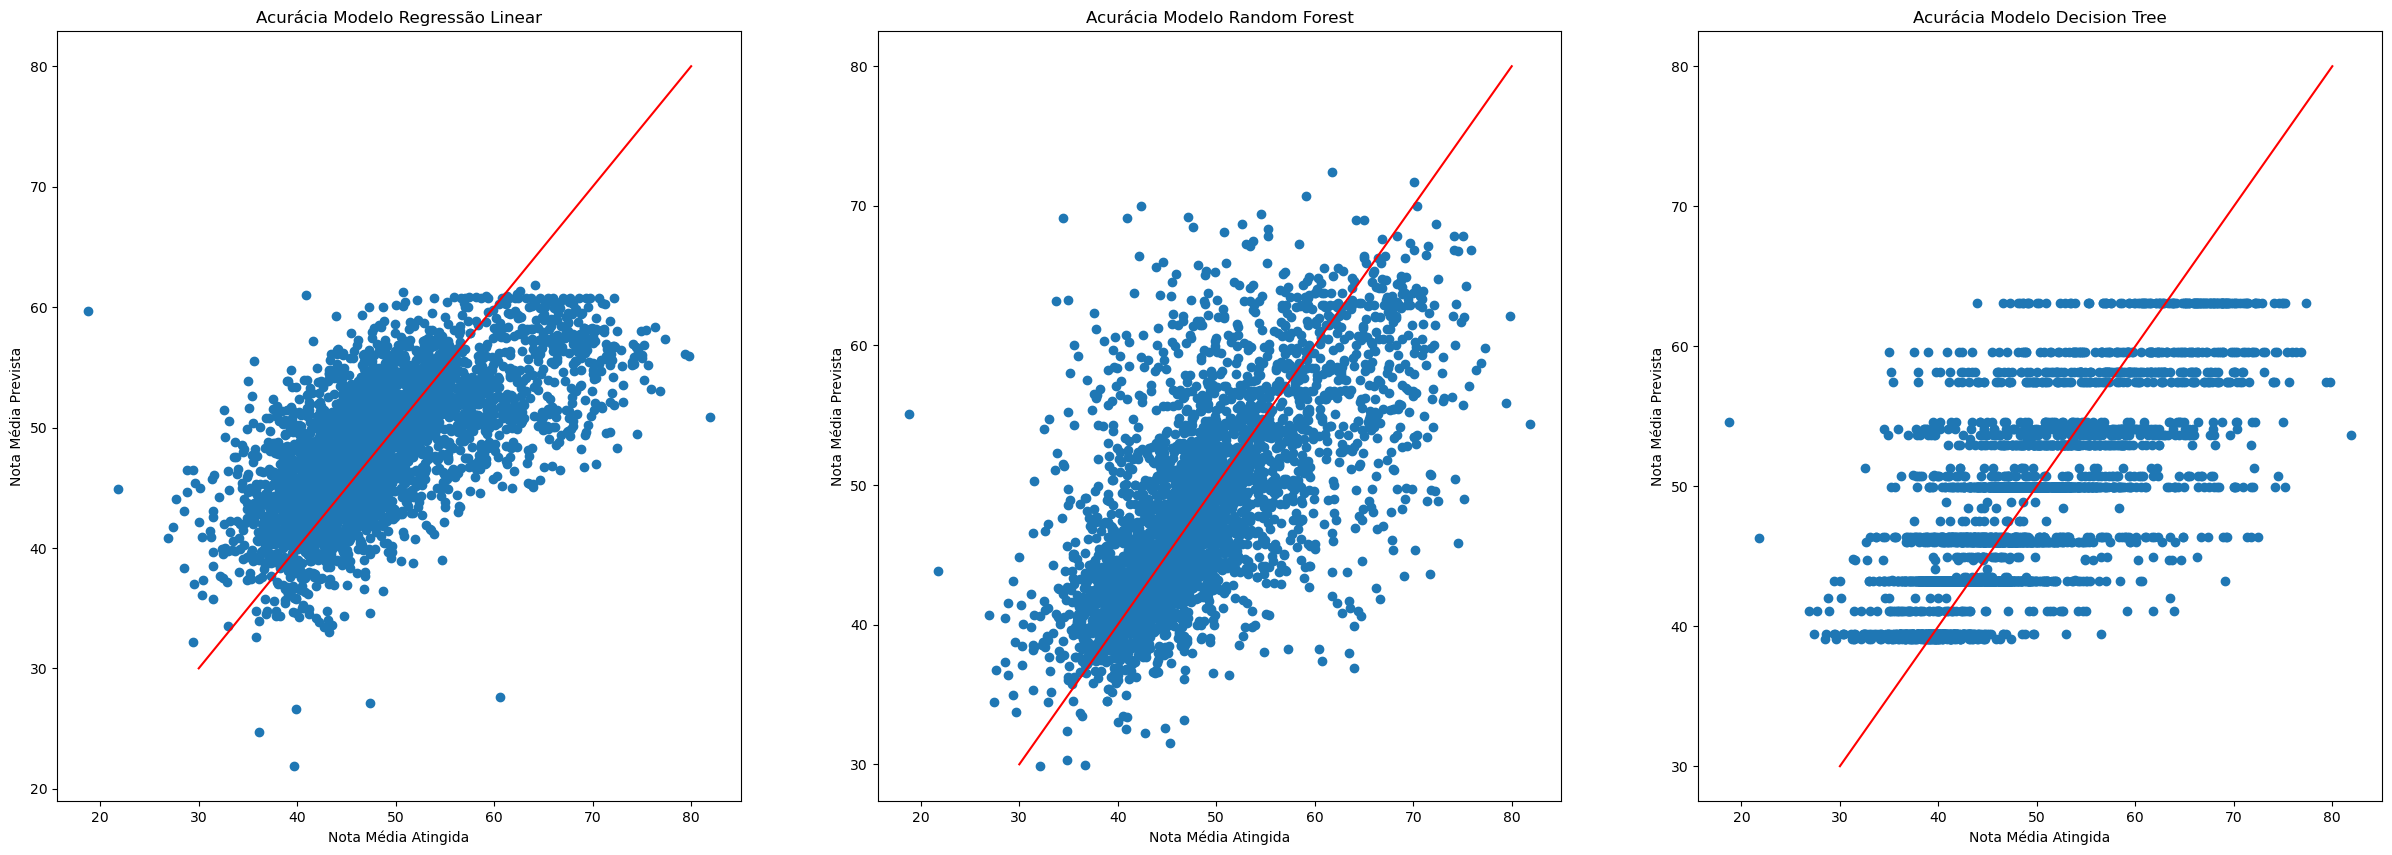

In [36]:
plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.scatter(y_test, predictions_rl)
plt.plot([30,80],[30,80], color = "red")
plt.title('Acurácia Modelo Regressão Linear')
plt.xlabel('Nota Média Atingida')
plt.ylabel('Nota Média Prevista')

plt.subplot(1,3,2)
plt.scatter(y_test, predictions_rg)
plt.plot([30,80],[30,80], color = "red")
plt.title('Acurácia Modelo Random Forest')
plt.xlabel('Nota Média Atingida')
plt.ylabel('Nota Média Prevista');

plt.subplot(1,3,3)
plt.scatter(y_test, dtree_pred)
plt.plot([30,80],[30,80], color = "red")
plt.title('Acurácia Modelo Decision Tree')
plt.xlabel('Nota Média Atingida')
plt.ylabel('Nota Média Prevista');

    Os gráficos de dispersão executados acima auxiliam na análise da acurácia e relação de cada modelo, visto que
    para cada valor previsto garante uma comparação do que deveria ser seu valor real.
    
    Em primeiro plano, o modelo de regressão linear apresenta valor mais regulares e padronizados, que, por mais 
    que rode diversas vezes as predições, sempre haverá predições similares. O modelo de random forest, em 
    contrapartida, apresenta diversos resultados, podendo ser um modelo melhor que a regressão em algumas horas
    e um modelo pior em outras, apresentando maior volatilidade de resultados. 
    
    De modo geral, os gráficos de dispersão acima ajudam a entender que as features escolhidas para previsão da
    target não garantiram os melhores resultados mas, no todo, auxilia na criação de um modelo de previsão 
    razoável que garante notas próximas à realidade mas que ainda apresenta falhas e valores aberrantes e fora do
    padrão. 

# Resultados

Escrever as conclusoes e analise dos resultados obtidos em ambas previsoes random forest e regressao

In [32]:
# Inputs para previsão

ano = int(input('Qual o ano de aplicação do ENEM? [2005]/[2007]'))
porte = input('Qual o porte da escola? [1 a 30]/[30 a 60]/[60 a 90]/[mais que 90]')
taxa_aprovacao = float(input('Qual a taxa de aprovação no Ensino Médio, em %?'))
regiao = input('Em qual região do Brasil está localizada? [Norte]/[Nordeste]/[Sul]/[Sudeste]/[Centro-Oeste]')
local = input('Onde está localizada? [Urbana]/[Rural]?')

In [33]:
# Criando dummies manualmente para as features qualitativas da escola digitadas no input acima

norte=0
nordeste=0
sul=0
sudeste=0
if regiao == 'Norte':
    norte = 1
elif regiao == 'Nordeste':
    nordeste=1
elif regiao == 'Sul':
    sul=1
elif regiao == 'Sudeste':
    sudeste=1

rural=0
if local=='Rural':
    rural=1

t_31a60 = 0
t_61a90 = 0
t_mais90 = 0
if porte == '30 a 60':
    t_31a60=1
elif porte == '60 a 90':
    t_61a90=1
elif porte == 'mais que 90':
    t_mais90=1

In [34]:
# Criando DataFrame para a escola
escola = pd.DataFrame({
    "ANO": [ano],
    "TAXA_APROVACAO": [taxa_aprovacao],
    "REGIAO_Nordeste": [nordeste],
    'REGIAO_Norte': [norte],
    'REGIAO_Sudeste': [sudeste],
    'REGIAO_Sul': [sul],
    'LOCAL_Rural': [rural],
    'TAMANHO_De 31 a 60 alunos': [t_31a60],
    'TAMANHO_De 61 a 90 alunos': [t_61a90],
    'TAMANHO_Maior que 90 alunos': [t_mais90]
})

In [35]:
# Prevendo target com regressão
previsao_regressao = results.predict([1]+escola.iloc[0,:].tolist())
print(f'Previsão da nota média do ENEM na dada escola por regressão linear: {previsao_regressao[0]}')

#  Prevendo target com random forest
previsao_random_forest = random_forest_model.predict(escola)
print(f'Previsão da nota média do ENEM na dada escola por random forest: {previsao_random_forest[0]}')

#  Prevendo target com random forest
dtree_pred = regression_tree.predict(X_test)
print(f'Previsão da nota média do ENEM na dada escola por Decision Tree: {dtree_pred[0]}')

Previsão da nota média do ENEM na dada escola por regressão linear: 51.570826798227245
Previsão da nota média do ENEM na dada escola por random forest: 53.93357666666669
Previsão da nota média do ENEM na dada escola por Decision Tree: 49.929689590121676


# Conclusão

    P4ortanto, em "Resultados" conseguimos responder a nossa pergunta: Qual a nota média no ENEM de uma escola considerando o ano de aplicação do ENEM, a região do Brasil na qual está localizada, o porte e a taxa de aprovação no Ensino Médio, e se é urbana ou rural?

# Referências

    Base de microdados retirada do site do Governo Federal:
    https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem-por-escola 

    link<https://agenciabrasil.ebc.com.br/radioagencia-nacional/educacao/audio/2020-09/ensino-medio-tem-o-maior-salto-no-ideb-desde-2005>
    
    link2<https://www.educamaisbrasil.com.br/educacao/noticias/nordeste-e-lider-nos-indices-de-educacao-aponta-censo>
    